<h2> Data Exploration </h2>
<p> In this section we aim to explore some data trends and augment more data points. <p>

In [11]:
import numpy as np
import pandas as pd

In [5]:
file_path = 'data.csv'
data = pd.read_csv(file_path)
data.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


We can clearly notice 4 columns. The only sensible features for this dataset are crop, mositure, and temperature. 'Pump' column depends on all the other features for a data point. 

<p>Dependent variable or target ---> pump</p>
<p>Independent variable or features ---> Crop, Moisture and Temperature</p>



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<p> All of our data points are non-null values which is ideal.</p>

In [10]:
data.sample(5)

,crop,moisture,temp,pump
71,cotton,637,29,1
8,cotton,642,45,1
108,cotton,482,27,0
9,cotton,723,11,1
164,cotton,998,28,1


<p>One drawback of the data is all measurements are only taken from "Cotton".<br> But it is a good practice to retain this feature to extend for other plant crop types in future</p>

<h2> Augmentation </h2>
<p> To increase the data points, we will augment or generate 300 new synthetic data points.<br>
We will analyze distributions of 'moisture', 'temperature' and 'pump' columns and use these distributions to generate new data</p>

In [17]:
# Determine number of points to generate
new_data_points = 500 - len(data)

# Extract unique values for 'crop' column. Right now the only unique value is "Cotton" but applying this logic to extend to other crops
unique_crops = data['crop'].unique()

<p> Before we generate synthetic data, we have to investigate and calculate Standard deviation for our columns.</p>

In [20]:
moisture_mean, moisture_std = data['moisture'].mean(), data['moisture'].std()
temp_mean, temp_std = data['temp'].mean(), data['temp'].std()
pump_values = data['pump'].unique()

In [22]:
# Set seed for reproductibility and generate synthetic data
np.random.seed(42)

In [23]:
new_crops = np.random.choice(unique_crops, size = new_data_points)
new_moisture = np.random.normal(moisture_mean, moisture_std, new_data_points).astype(int)
new_temp = np.random.normal(temp_mean, temp_std, new_data_points)
new_pump = np.random.choice(pump_values, size= new_data_points )

<p>Let's store all these new data into a new pandas DataFrame object in order to concatinate with our original datapoints and then store them in a CSV file.</p>

In [24]:
synth_data = pd.DataFrame({
    'crop':new_crops,
    'moisture':new_moisture,
    'temp':new_temp,
    'pump': new_pump

})

In [26]:
synth_data.sample(5)

,crop,moisture,temp,pump
207,cotton,776,18.358764,1
93,cotton,541,47.657227,1
15,cotton,476,27.978303,0
47,cotton,928,12.451429,1
114,cotton,579,31.362121,0


In [28]:
augmented_data = pd.concat([data, synth_data], ignore_index=True)

# Save augmented data to a csv file
augmented_file_path = 'augmented_data.csv'
augmented_data.to_csv(augmented_file_path, index=False)


<h2>Verifying synthetic data </h2>
<p>It is very important to verify the data distributions of generated data to be certain there are no outliers or anamolies.</p>
<p>Histograms are generally a great visual tool to understand frequency distribution of features and we will leverage this to verify our distributions.</p>

c:\Users\admin\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

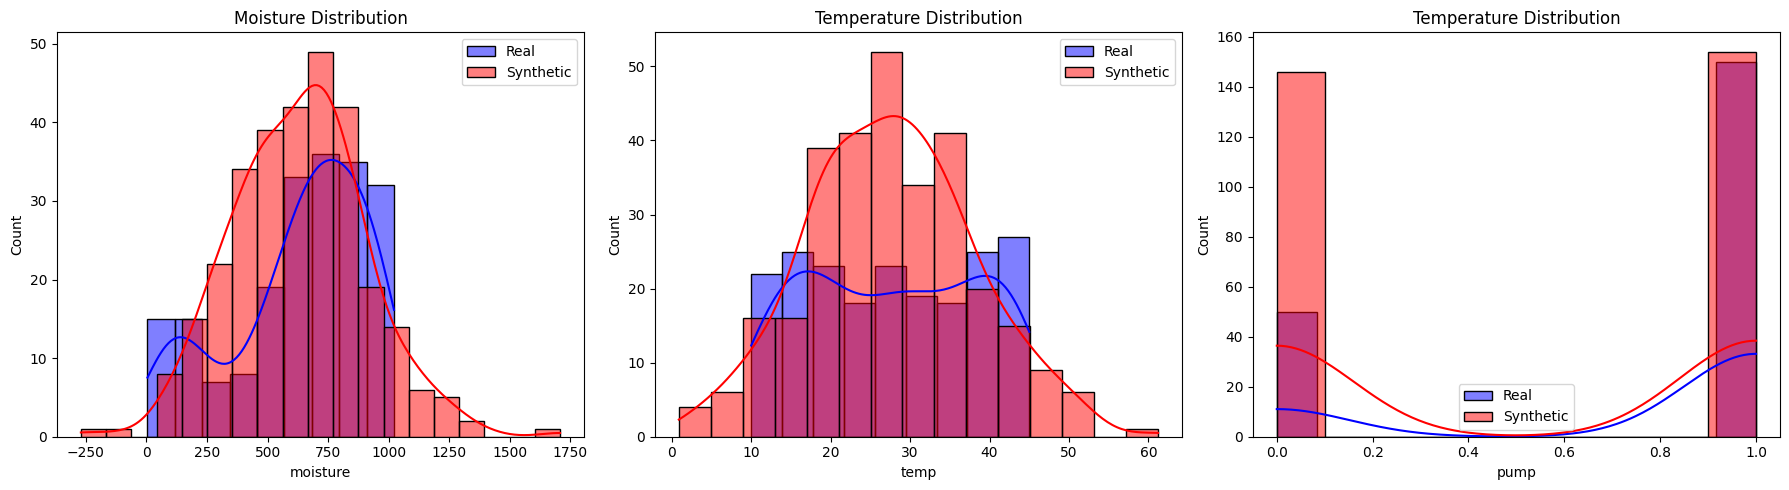

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Histograms for 'moisture', 'temp' and 'pump'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Moisture 
sns.histplot(data['moisture'], kde=True, color='blue', label = 'Real', ax=axes[0])
sns.histplot(synth_data['moisture'], kde=True, color='Red', label = 'Synthetic', ax=axes[0])
axes[0].set_title('Moisture Distribution')
axes[0]. legend()

# Temperature
sns.histplot(data['temp'], kde=True, color='blue', label = 'Real', ax=axes[1])
sns.histplot(synth_data['temp'], kde=True, color='Red', label = 'Synthetic', ax=axes[1])
axes[1].set_title('Temperature Distribution')
axes[1]. legend()

# Pump
sns.histplot(data['pump'], kde=True, color='blue', label = 'Real', ax=axes[2])
sns.histplot(synth_data['pump'], kde=True, color='Red', label = 'Synthetic', ax=axes[2])
axes[2].set_title('Temperature Distribution')
axes[2]. legend()

plt.tight_layout()
plt.show()


<p></p>

Statistical verification:
Kolmogorov-Smirnov test will compare two distributions and tell us if they are pulling from the same underlying distribution.

'ks_2samp' ouputs ks values and p values.
P values if are between 0.1 and 0.9 there is certainly no reason to suspect our syntheic data and if its below 0.02 its strongly indiciated that our hypothesis fails.

In [34]:
# Statistical tests: KS test for 'moisture' and 'temp'
moisture_ks_stat, moisture_ks_p_value = ks_2samp(data['moisture'], synth_data['moisture'])
temp_ks_stat, temp_ks_p_value = ks_2samp(data['temp'], synth_data['temp'])

moisture_ks_stat, moisture_ks_p_value, temp_ks_stat, temp_ks_p_value

(0.10666666666666667,
 0.12398372491604806,
 0.11166666666666666,
 0.09514476355265436)

<p> Hence we successfully verified that our synthetic data follows distribution of our real sensor data and KS test seconds that. </p>